# 실습 1. 접평면 그리기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

DELTA_X = 1e-5

def partial_derivative(f, tan_point, h=DELTA_X):
    df_dx = (f(tan_point[0] + h, tan_point[1]) - f(tan_point[0], tan_point[1])) / h
    df_dy = (f(tan_point[0], tan_point[1] + h) - f(tan_point[0], tan_point[1])) / h
    return df_dx, df_dy

def plot_tan_plane(f,tan_point,interval):
    x_space = np.linspace(*interval, 100)
    y_space = np.linspace(*interval, 100)
    X, Y = np.meshgrid(x_space, y_space)
    Z = f(X, Y)

    # derivative
    df_dx, df_dy = partial_derivative(f, tan_point)
    tan_plane = df_dx * (X - tan_point[0]) + df_dy * (Y - tan_point[1]) + f(tan_point[0], tan_point[1])

    # Create separate 3D plots for each function
    fig = plt.figure(figsize=(12, 6))

    # plot
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    ax1.plot_surface(X, Y, tan_plane, cmap='Reds', alpha=0.5)
    ax1.scatter(tan_point[0], tan_point[1], f(tan_point[0], tan_point[1]), marker='s', color='black', s=10)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')

    plt.tight_layout()
    plt.show()

In [2]:
def func(x,y):
    return x**2 + y**2

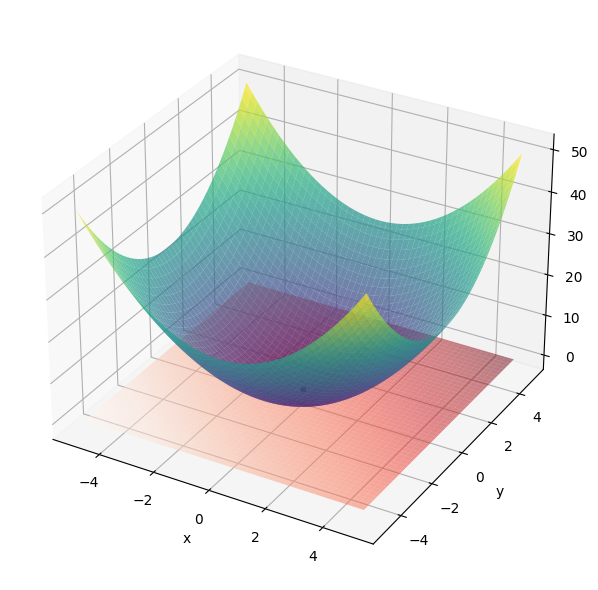

In [3]:
plot_tan_plane(func, (0,0), (-5, 5))

# 2. 최적화 문제

In [4]:
def func(x,y):
    return -x**4-y**4+x**3+3*x**2+y**2+(x*y)**2

[best_xy] :  (2.1072645120398503, 1.649322693914061)
[best_performance] :  10.360460742898864


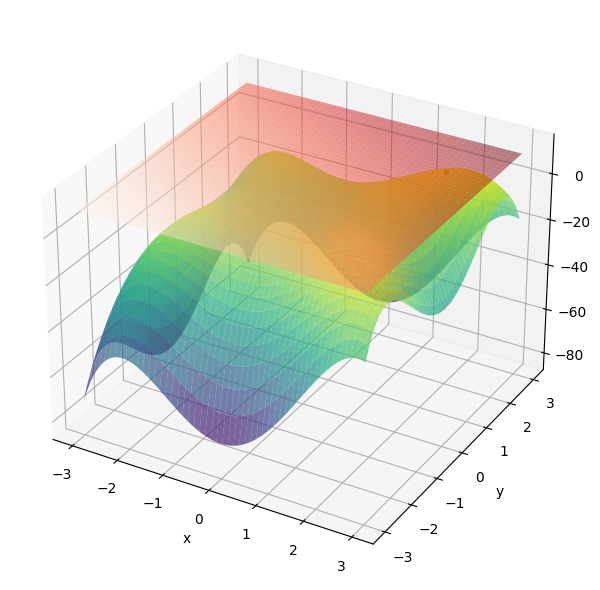

In [5]:
EPSILON=1e-7

def gradient_ascent(xy_start):
    # partial_derivative
    best_x = xy_start[0]
    best_y = xy_start[1]
    lr = 2e-5
    df_dx = 100
    df_dy = 100

    while min(abs(df_dx), abs(df_dy)) > EPSILON:
      df_dx, df_dy = partial_derivative(func, (best_x, best_y))
      best_x = best_x + lr * df_dx
      best_y = best_y + lr * df_dy

    return (best_x, best_y)

xy_start = (0,0)
best_xy = gradient_ascent(xy_start)

print('[best_xy] : ', best_xy)
print('[best_performance] : ', func(best_xy[0],best_xy[1]))
plot_tan_plane(func, best_xy, (-3, 3))

# 3. Hessian matrix를 구하고, local minimum인지 확인